In [1]:
from sklearn.datasets import make_classification
X, Y = make_classification(n_samples=200, n_classes=2, n_features=10, n_redundant=0, random_state=1)
X,Y

(array([[-1.51107661,  0.60874908, -0.15323616, ..., -0.86482994,
         -0.20290111, -0.87142207],
        [ 1.44544531,  0.51896937,  0.64515265, ..., -1.04339961,
          0.04854689, -2.62101164],
        [ 0.37167029,  0.51350548, -1.39881282, ...,  0.14225137,
         -1.13283476,  1.85300949],
        ...,
        [-0.95090925, -0.21873346,  1.29354962, ..., -0.04586669,
         -0.97210712, -0.70435033],
        [-0.4466992 ,  0.74488454, -0.9612636 , ...,  0.61223252,
          1.67977906,  0.20437739],
        [ 1.00796648,  1.1253235 ,  0.43499832, ...,  0.44838065,
         -1.75951426,  0.39233491]]),
 array([1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
        0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1,
        1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1,
        1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
        1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
   

In [2]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)
X_train,Y_train

(array([[-0.01781755,  0.57180488, -1.06787658, ...,  0.14676526,
         -1.53256465, -0.6001388 ],
        [-0.33128317,  1.00088142,  0.45128402, ..., -0.85145566,
         -1.02313519,  0.38653915],
        [ 0.03406586,  2.82729979,  0.75732812, ..., -0.32674455,
         -0.33035072,  0.00835916],
        ...,
        [ 0.82989438, -0.47738166,  0.51655247, ...,  0.54673027,
          1.05726384,  0.82779143],
        [ 0.01143657,  0.23732436, -0.84391149, ...,  1.68838378,
          1.97930228,  1.4309328 ],
        [ 1.1569625 ,  0.92211037,  2.03967227, ...,  1.84823337,
          1.52271262, -0.17283937]]),
 array([1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0,
        1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1,
        0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0,
        0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
        1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1,
   

In [3]:
#!pip install -U scikit-learn scipy matplotlib
!

In [6]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_features=5, n_estimators=100)
rf.fit(X_train, Y_train)
rf.predict(X_test)

array([0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

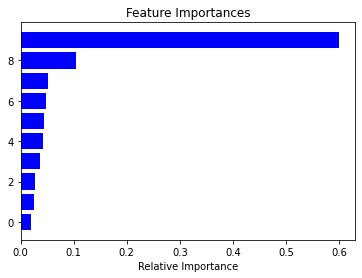

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


importances = rf.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
#plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [13]:
from sklearn.datasets import make_classification
X, Y = make_classification(n_samples=200, n_classes=2, n_features=10, n_redundant=0, random_state=1)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_features=5, n_estimators=100)
rf.fit(X_train, y_train)
rf.predict(X_test)
rf.score(X_test, y_test)

0.875

In [14]:
from sklearn.model_selection import GridSearchCV
import numpy as np
max_features_range = np.arange(1,6,1)
n_estimators_range = np.arange(10,210,10)
param_grid = dict(max_features=max_features_range, n_estimators=n_estimators_range)
rf = RandomForestClassifier()
grid = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5)
grid.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_features': array([1, 2, 3, 4, 5]),
                         'n_estimators': array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120, 130,
       140, 150, 160, 170, 180, 190, 200])})

In [18]:
import pandas as pd
grid_results = pd.concat([pd.DataFrame(grid.cv_results_["params"]),pd.DataFrame(grid.cv_results_["mean_test_score"], columns=["Accuracy"])],axis=1)
grid_results.head()

,max_features,n_estimators,Accuracy
0,1,10,0.45625
1,1,20,0.47500
2,1,30,0.43125
3,1,40,0.43125
4,1,50,0.42500


In [19]:
grid_contour = grid_results.groupby(['max_features','n_estimators']).mean()
grid_contour

Accuracy
max_features n_estimators          
1            10             0.45625
             20             0.47500
             30             0.43125
             40             0.43125
             50             0.42500
...                             ...
5            160            0.45000
             170            0.46250
             180            0.48125
             190            0.40625
             200            0.45000

[100 rows x 1 columns]

In [20]:
grid_reset = grid_contour.reset_index()
grid_reset.columns = ['max_features', 'n_estimators', 'Accuracy']
grid_pivot = grid_reset.pivot('max_features', 'n_estimators')
grid_pivot

Accuracy                    ...                           
n_estimators      10       20       30   ...      180      190      200
max_features                             ...                           
1             0.45625  0.47500  0.43125  ...  0.46250  0.45000  0.45625
2             0.49375  0.46250  0.42500  ...  0.40000  0.44375  0.44375
3             0.47500  0.43750  0.45625  ...  0.45000  0.41875  0.49375
4             0.48750  0.45000  0.51875  ...  0.43750  0.45000  0.45000
5             0.40000  0.53125  0.41250  ...  0.48125  0.40625  0.45000

[5 rows x 20 columns]

In [21]:
x = grid_pivot.columns.levels[1].values
y = grid_pivot.index.values
z = grid_pivot.values
import plotly.graph_objects as go
layout = go.Layout(
            xaxis=go.layout.XAxis(
              title=go.layout.xaxis.Title(
              text='n_estimators')
             ),
             yaxis=go.layout.YAxis(
              title=go.layout.yaxis.Title(
              text='max_features') 
            ) )
fig = go.Figure(data = [go.Contour(z=z, x=x, y=y)], layout=layout )
fig.update_layout(title='Hyperparameter tuning', autosize=False,
                  width=500, height=500,
                  margin=dict(l=65, r=50, b=65, t=90))
fig.show()

In [22]:
import plotly.graph_objects as go
fig = go.Figure(data= [go.Surface(z=z, y=y, x=x)], layout=layout )
fig.update_layout(title='Hyperparameter tuning',
                  scene = dict(
                    xaxis_title='n_estimators',
                    yaxis_title='max_features',
                    zaxis_title='Accuracy'),
                  autosize=False,
                  width=800, height=800,
                  margin=dict(l=65, r=50, b=65, t=90))
fig.show()